# Report about Car-Accident-Severity on Data Science Basis.

## Applied Data Science IBM Capstone Project
### Content of Report
1. Business Understanding
2. Data Access & Data Wrangling
3. Exploratory Data Analysis
4. Modeling & Evaluation
5. Conclusion

## 1. Business Understanding
Days by days, there are many people killed by car accident all over the world. The reasons of that are various, such as, climate conditions, car status, light conditions, road conditions, etc.
By analyzing the data provided by seattle_car_accident_severity, we can find out realtion between different variables.
People who are practioners in car industry or buyers of cars, may be interested in this report.

## 2. Data Access & Data Wrangling
### 2.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl

### 2.2 File Handlilng

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_87943c818403445cbaef81e012573e23 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Wyi2CnCKgqeACX-DAa_7OI_ywwwqffYuFOorXysuabXe',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_87943c818403445cbaef81e012573e23.get_object(Bucket='caraccidentseverity-donotdelete-pr-xuu2eh9y4dun6j',Key='Car_Accident_Severity.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### 2.3 Data Selection

In [3]:
df1 = df.drop(["LOCATION", "SEVERITYCODE.1", "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "INTKEY", 
          "EXCEPTRSNCODE", "SDOT_COLCODE", "ST_COLCODE", "SEGLANEKEY", "CROSSWALKKEY", "SDOTCOLNUM", 
          "STATUS", "EXCEPTRSNDESC", "INCDATE", "INCDTTM", "SDOT_COLDESC", "PEDROWNOTGRNT", "UNDERINFL", 
        "PEDCYLCOUNT", "HITPARKEDCAR", "ST_COLDESC", "SEVERITYDESC", "ADDRTYPE", "COLLISIONTYPE", "PEDCOUNT"], axis=1)
df1.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,2,2,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4,3,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,3,3,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,2,2,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN


### 2.4 Fix Missing Values

In [4]:
# NaN values are placed by the mean values of the column
avg_LONGITUDE = df1["X"].astype("float").mean(axis=0)
print("Average of LONGITUDE:", avg_LONGITUDE)
df1['X'].replace(np.NaN, avg_LONGITUDE, inplace=True)
# NaN values are placed by the mean values of the column
avg_LATITUDE = df1["Y"].astype("float").mean(axis=0)
print("Average of LATITUDE:", avg_LATITUDE)
df1['Y'].replace(np.NaN, avg_LATITUDE, inplace=True)

Average of LONGITUDE: -122.33051843904114
Average of LATITUDE: 47.619542517688615


In [5]:
# Replacing NaN value by Unknown
df1['JUNCTIONTYPE'].replace(np.NaN, "Unknown", inplace=True)
df1['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
Unknown                                               6338
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Name: JUNCTIONTYPE, dtype: int64

In [6]:
#Replacing NaN value by N
df1['INATTENTIONIND'].replace(np.NaN, "N", inplace=True)
df1['INATTENTIONIND'].value_counts()

N    164868
Y     29805
Name: INATTENTIONIND, dtype: int64

In [7]:
# Replacing NaN value by Unknown
df1['WEATHER'].replace(np.NaN, "Unknown", inplace=True)
df1['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      20172
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [8]:
# Replacing NaN value by Unknown
df1['ROADCOND'].replace(np.NaN, "Unknown", inplace=True)
df1['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            20090
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [9]:
# Replacing NaN value by Unknown
df1['LIGHTCOND'].replace(np.NaN, "Unknown", inplace=True)
df1['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      18643
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [10]:
# Replacing NaN value by N
df1['SPEEDING'].replace(np.NaN, "N", inplace=True)
df1['SPEEDING'].value_counts()

N    185340
Y      9333
Name: SPEEDING, dtype: int64

In [11]:
df1.isna().sum()

SEVERITYCODE      0
X                 0
Y                 0
PERSONCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

### 2.5 Binary & Encoding

In [12]:
#Converting Severity Code from (1/2) tp (0/1)
severity_code = df1['SEVERITYCODE'].values
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)
df1["SEVERITYCODE"] = severity_code

In [13]:
encoding_WEATHER = {"WEATHER": 
                            {"Clear": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Raining": 2,
                             "Overcast": 3,
                             "Snowing": 4,
                             "Fog/Smog/Smoke": 5,
                             "Sleet/Hail/Freezing Rain": 6,
                             "Blowing Sand/Dirt": 7,
                             "Severe Crosswind": 8,
                             "Partly Cloudy": 9}}
df1.replace(encoding_WEATHER, inplace=True)
df1['WEATHER'].value_counts()

1    132139
2     33145
3     27714
4       907
5       569
6       113
7        56
8        25
9         5
Name: WEATHER, dtype: int64

In [14]:
encoding_SPEEDING = {"SPEEDING": 
                            {"Y": 1,
                             "N": 0,
                              }}
df1.replace(encoding_SPEEDING, inplace=True)
df1['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [15]:
encoding_LIGHTCOND = {"LIGHTCOND": 
                            {"Daylight": 0,
                             "Unknown": 0,
                             "Other": 0,
                             "Dark - Street Lights On": 1,
                             "Dusk": 1,
                             "Dawn": 1,
                             "Dark - No Street Lights": 1,
                             "Dark - Street Lights Off": 1,
                             "Dark - Unknown Lighting": 1,
                              }}
df1.replace(encoding_LIGHTCOND, inplace=True)
df1['LIGHTCOND'].value_counts()

0    135015
1     59658
Name: LIGHTCOND, dtype: int64

In [16]:
encoding_ROADCOND = {"ROADCOND": 
                            {"Dry": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Wet": 2,
                             "Ice": 3,
                             "Snow/Slush": 4,
                             "Standing Water": 5,
                             "Sand/Mud/Dirt": 6,
                             "Oil": 7,
                              }}
df1.replace(encoding_ROADCOND, inplace=True)
df1['ROADCOND'].value_counts()

1    144732
2     47474
3      1209
4      1004
5       115
6        75
7        64
Name: ROADCOND, dtype: int64

In [17]:
encoding_JUNCTIONTYPE = {"JUNCTIONTYPE": 
                            {"Mid-Block (not related to intersection)": 1,
                             "Unknown": 1,
                             "At Intersection (intersection related)": 2,
                             "Mid-Block (but intersection related)": 3,
                             "Driveway Junction": 4,
                             "At Intersection (but not related to intersection)": 5,
                             "Ramp Junction": 6,
                              }}
df1.replace(encoding_JUNCTIONTYPE, inplace=True)
df1['JUNCTIONTYPE'].value_counts()

1    96138
2    62810
3    22790
4    10671
5     2098
6      166
Name: JUNCTIONTYPE, dtype: int64

In [18]:
encoding_INATTENTIONIND = {"INATTENTIONIND": 
                            {"Y": 1,
                             "N": 0,
                              }}
df1.replace(encoding_INATTENTIONIND, inplace=True)
df1['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [19]:
df1.isna().sum()

SEVERITYCODE      0
X                 0
Y                 0
PERSONCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

In [20]:
df1.head(10)

,SEVERITYCODE,X,Y,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,1,-122.323148,47.703140,2,2,2,0,3,2,0,0
1,0,-122.347294,47.647172,2,2,1,0,2,2,1,0
2,0,-122.334540,47.607871,4,3,1,0,3,1,0,0
3,0,-122.334803,47.604803,3,3,1,0,1,1,0,0
4,1,-122.306426,47.545739,2,2,2,0,2,2,0,0
5,0,-122.387598,47.690575,2,2,2,0,1,1,0,0
6,0,-122.338485,47.618534,2,2,2,0,2,2,0,0
7,1,-122.320780,47.614076,3,1,2,0,1,1,0,0
8,0,-122.335930,47.611904,2,2,1,0,1,1,0,0
9,1,-122.384700,47.528475,2,2,2,0,1,1,0,0


### 2.6 Brief Introduction about Data

In [21]:
#Descriptive Stats
descriptive_stats= df1.describe(include="all")
descriptive_stats.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
count,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000
mean,0.298901,-122.330518,47.619543,2.444427,1.920780,1.768597,0.153103,1.486385,1.278020,0.306452,0.047942
std,0.457778,0.029563,0.055382,1.345929,0.631047,0.941948,0.360088,0.790342,0.518409,0.461021,0.213644
min,0.000000,-122.419091,47.495573,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,-122.347801,47.578153,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000


In [22]:
#Getting the shape of the data frame
df1.shape

(194673, 11)

In [23]:
#Getting the type of each column
df1.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
PERSONCOUNT         int64
VEHCOUNT            int64
JUNCTIONTYPE        int64
INATTENTIONIND      int64
WEATHER             int64
ROADCOND            int64
LIGHTCOND           int64
SPEEDING            int64
dtype: object

## 3. Exploratory Data Analysis

### 3.1 Basic Data Visualization

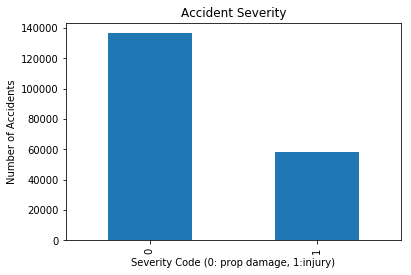

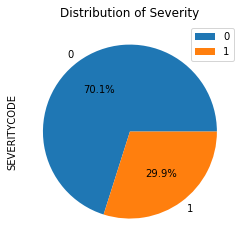

In [24]:
df1.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel('Severity Code (0: prop damage, 1:injury)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity')
df1['SEVERITYCODE'].value_counts().to_frame().plot(kind='pie', y='SEVERITYCODE',autopct='%1.1f%%')
plt.title('Distribution of Severity')
plt.show()

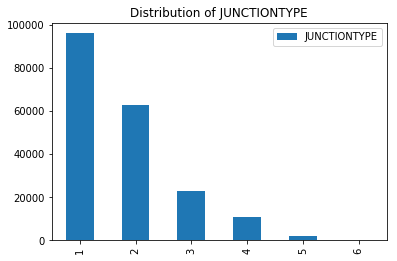

In [25]:
df1['JUNCTIONTYPE'].value_counts().to_frame().plot(kind='bar', y='JUNCTIONTYPE')
plt.title('Distribution of JUNCTIONTYPE')
plt.show()

3.1.2 Data Visualization on Weather Condition

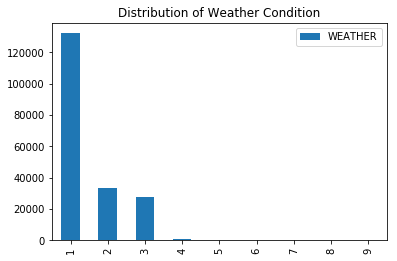

In [26]:
df1['WEATHER'].value_counts().to_frame().plot(kind='bar', y='WEATHER')
plt.title('Distribution of Weather Condition')
plt.show()

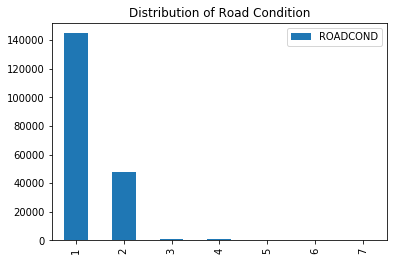

In [27]:
df1['ROADCOND'].value_counts().to_frame().plot(kind='bar', y='ROADCOND')
plt.title('Distribution of Road Condition')
plt.show()

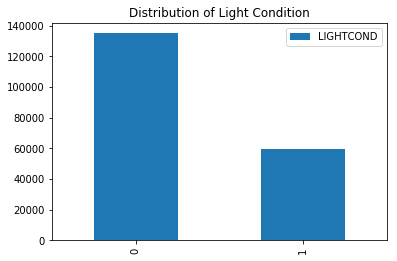

In [28]:
df1['LIGHTCOND'].value_counts().to_frame().plot(kind='bar', y='LIGHTCOND')
plt.title('Distribution of Light Condition')
plt.show()

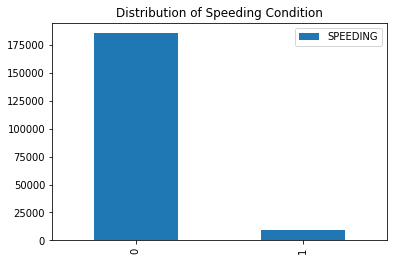

In [29]:
df1['SPEEDING'].value_counts().to_frame().plot(kind='bar', y='SPEEDING')
plt.title('Distribution of Speeding Condition')
plt.show()

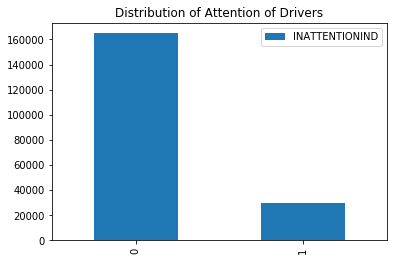

In [30]:
df1['INATTENTIONIND'].value_counts().to_frame().plot(kind='bar', y='INATTENTIONIND')
plt.title('Distribution of Attention of Drivers')
plt.show()

In [31]:
#Installing Folium Package for mapping
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [46]:
#Make reduced df from feature_df to get a few random points to make map
limit = 100005
reduced_df = df1.iloc [0:limit:5, 0:]

In [47]:
#Folium Map
# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

In [49]:
# instantiate a mark cluster object for the incidents in the dataframe
from folium import plugins
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
import webbrowser
for X, Y, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[X, Y],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

# display map
seattle_map
seattle_map.save("seattlemap.html")
webbrowser.open("seattlemap.html")

## 4. Modeling & Evaluation

### 4.1 Preparation

In [33]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [34]:
#Making a new data frame
Features= df1[['X', 'Y', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING']]

In [35]:
X=Features
Y=df1['SEVERITYCODE'].values

### 4.2 Data Normalization

In [36]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
#Splitting the data into train-test sets
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (155738, 10) (155738,)
Test set: (38935, 10) (38935,)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


### 4.3 K-Nearest Neighbours

In [63]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNNeigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat = kNNeigh.predict(X_test)
    
    
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat);
    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67, 0.72, 0.7 , 0.73, 0.71, 0.73, 0.72, 0.73, 0.73])

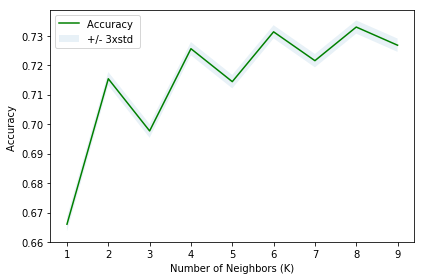

In [64]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [65]:
print( "Best k =", mean_acc.argmax()+1)
print("K-Nearest Neighbours Accuray: ", metrics.accuracy_score(Y_test, yhat))

Best k = 8
K-Nearest Neighbours Accuray:  0.7267753948889174


In [66]:
# Jaccard Similarity Score
jaccard_similarity_score(Y_test, yhat)
# F1-SCORE
f1_score(Y_test, yhat, average='macro')

0.6278372844403495

In [67]:
print ("Accuracy", accuracy_score(yhatLR,Y_test))
print (classification_report(Y_test, yhatLR))
cnf_matrix = confusion_matrix(Y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)

Accuracy 0.7030949017593425
              precision    recall  f1-score   support

           0       0.71      0.97      0.82     27425
           1       0.48      0.07      0.12     11510

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.60      0.52      0.47     38935
weighted avg       0.64      0.70      0.61     38935



Confusion matrix, without normalization
[[  759 10751]
 [  809 26616]]


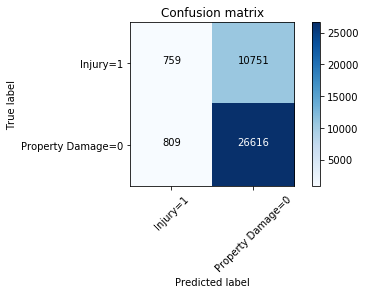

In [68]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

### 4.4 Decision Tree

In [57]:
#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(X_train,Y_train)

        #Make Prediction:
yhatDT = DT.predict(X_test)

        #Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, Y_test))

        #Visualization
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(Y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(yhatDT,Y_test))

        #COnfusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy score for Decision Tree =  0.7521510209323231
Confusion Matrix - Decision Tree
Predicted      0     1    All
True                         
0          26193  1232  27425
1           8418  3092  11510
All        34611  4324  38935
              precision    recall  f1-score   support

           0       0.96      0.76      0.84     34611
           1       0.27      0.72      0.39      4324

   micro avg       0.75      0.75      0.75     38935
   macro avg       0.61      0.74      0.62     38935
weighted avg       0.88      0.75      0.79     38935



In [58]:
  #Plot it
cnf_matrix = confusion_matrix(Y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 3092  8418]
 [ 1232 26193]]


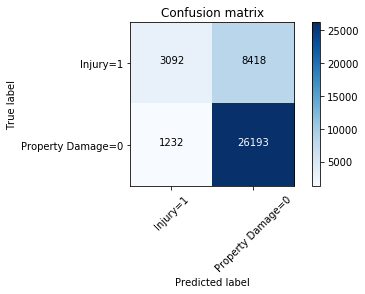

In [59]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

### 4.5 Logistic Regression

In [61]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print(log_loss(Y_test, yhat_prob))
print ("Accuracy", accuracy_score(yhatLR,Y_test))
print (classification_report(Y_test, yhatLR))
cnf_matrix = confusion_matrix(Y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)

0.5828257292180228
Accuracy 0.7030949017593425
              precision    recall  f1-score   support

           0       0.71      0.97      0.82     27425
           1       0.48      0.07      0.12     11510

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.60      0.52      0.47     38935
weighted avg       0.64      0.70      0.61     38935



Confusion matrix, without normalization
[[  759 10751]
 [  809 26616]]


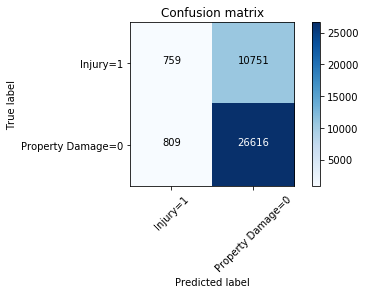

In [62]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

## 5. Conclusion

As what is presented above, decision tree model is the best model to train this dataset.